In [40]:
import pandas as pd # linear algebra
import numpy as np 
import pandasql as pq # allows to query pandas DataFrames using SQL syntax (eg. sqldf)
import seaborn as sns
import matplotlib.pyplot as plt #Provides a MATLAB-like plotting framework (xlabel, ylabel)
print('Modules are imported.')

Modules are imported.


In [41]:
# Get csv file as Dataframe 
dff=pd.read_csv("covid19_Confirmed_dataset.csv")
# c1 contains all columns names in the dataframe
c1=list(dff.columns)

dff.shape
dff.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [42]:
# List required as columns for the desired dataframe
country = []
date1=[]
cases=[]
for x in range(0,265):
    for i in range(4,103):
        country.append(dff.iloc[x, 1])
        date1.append(c1[i])
        cases.append(dff.iloc[x, i])

In [43]:
# New desired dataframe 
cleaned_covid = pd.DataFrame(columns=['date1', 'country','cases'])
cleaned_covid['date1']=pd.Series(date1)
cleaned_covid['country']=pd.Series(country)
cleaned_covid['cases']=pd.Series(cases)

In [44]:
cleaned_covid

,date1,country,cases
0,1/22/20,Afghanistan,0
1,1/23/20,Afghanistan,0
2,1/24/20,Afghanistan,0
3,1/25/20,Afghanistan,0
4,1/26/20,Afghanistan,0
...,...,...,...
26230,4/25/20,Comoros,0
26231,4/26/20,Comoros,0
26232,4/27/20,Comoros,0
26233,4/28/20,Comoros,0


In [45]:
cleaned_covid.to_csv('cleaned_covid.csv')

In [46]:
# Connect with postgreSQL
!pip install psycopg2
import psycopg2
connection = psycopg2.connect(user = "postgres",password = "hackit",host = "127.0.0.1",port = "5432",database = "test")

In [100]:
clean="""select *
from cleaned_covid2

"""
clean1=pd.read_sql_query(clean, connection)
clean1
clean1.to_csv("clean2.csv")

In [78]:
# To check distribution of cases
sqql="""select avg(cases) as avgcases, min(cases), max(cases)
from cleaned_covid2
"""
sqqll=pd.read_sql_query(sqql, connection)

In [79]:
sqqll

,avgcases,min,max
0,2682.662588,0,1039909


In [80]:
# Query to get monthly growth rate, country wise
monthss="""
with months as(
    select 
        extract(month from date1) as month,idd
    from 
        cleaned_covid2
    ),

day as(
    select 
        extract(day from date1) as days, idd
    from 
        cleaned_covid2
    ),

/*averagecases as(
    select avg(cases) as avgcases, idd
    from cleaned_covid2
    group by idd
    ),
*/
eom as(
    select 
        Distinct cleaned_covid2.*, months.month,
        lag(cases,1) over(partition by country order by month) as prev_cases
    from 
        cleaned_covid2
        join months on cleaned_covid2.idd=months.idd 
        join day on months.idd=day.idd 
        --join averagecases on day.idd=averagecases.idd 
    where 
        (days='31' and month in ('1','3')) or
        (days='30' and month='4') or
        (days='29' and month in ('2','4'))
    order by 
        country
   limit 100
   )


select 
    month, eom.country, eom.cases, 
    (eom.cases-prev_cases)*100/(COALESCE(NULLIF(prev_cases, 0), '1')) as monthly_growth_rate
from 
    eom
order by
    eom.country

"""
    
month=pd.read_sql_query(monthss,connection)

In [81]:
month

,month,country,cases,monthly_growth_rate
0,1.0,Afghanistan,0,NaN
1,2.0,Afghanistan,1,100.0
2,3.0,Afghanistan,174,17300.0
3,4.0,Afghanistan,1939,1014.0
4,1.0,Albania,0,NaN
...,...,...,...,...
95,4.0,Belgium,47859,274.0
96,1.0,Belize,0,NaN
97,2.0,Belize,0,0.0
98,3.0,Belize,3,300.0


In [82]:
# Store as csv 
month.to_csv("monthly_growth_rates.csv")

In [52]:
# Get csv file as Dataframe 
dfzz=pd.read_csv("monthly_growth_rates.csv")

In [89]:
# Get csv file for Happiness report as Dataframe 
dfhappy=pd.read_csv("worldwide_happiness_report.csv")

In [90]:
dfhappy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [91]:
dfhappy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.4+ KB


In [92]:
dfhappy.drop_duplicates(inplace=True)

In [93]:
# Drop irrelevant columns
dfhappy.drop(['Generosity', 'Perceptions of corruption','Score','Overall rank'], axis=1, inplace=True)

In [94]:
dfhappy

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [57]:
# Get all column names
list(dfhappy.columns)

['Country or region',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices']

In [58]:
# Rename column names to remove spaces
dfhappy.rename(columns={'Country or region':'Country_or_region',
 'GDP per capita':'GDP_per_capita',
 'Social support':'Social_support',
 'Healthy life expectancy':'Healthy_life_expectancy',
 'Freedom to make life choices':'Freedom_to_make_life_choices'}, inplace=True)

In [59]:
dfhappy

,Country_or_region,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [60]:
# Join to tables/dataframes
joining="""
select 
    * 
from 
    dfzz 
    join dfhappy
    on dfzz.country=dfhappy.Country_or_region
"""
joinn=pq.sqldf(joining,locals())

In [61]:
joinn

,Unnamed: 0,month,country,cases,monthly_growth_rate,Country_or_region,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices
0,0,1.0,Afghanistan,0,NaN,Afghanistan,0.350,0.517,0.361,0.000
1,1,2.0,Afghanistan,1,100.0,Afghanistan,0.350,0.517,0.361,0.000
2,2,3.0,Afghanistan,174,17300.0,Afghanistan,0.350,0.517,0.361,0.000
3,3,4.0,Afghanistan,1939,1014.0,Afghanistan,0.350,0.517,0.361,0.000
4,4,1.0,Albania,0,NaN,Albania,0.947,0.848,0.874,0.383
...,...,...,...,...,...,...,...,...,...,...
71,91,4.0,Belarus,13181,8571.0,Belarus,1.067,1.465,0.789,0.235
72,92,1.0,Belgium,0,NaN,Belgium,1.356,1.504,0.986,0.473
73,93,2.0,Belgium,1,100.0,Belgium,1.356,1.504,0.986,0.473
74,94,3.0,Belgium,12775,1277400.0,Belgium,1.356,1.504,0.986,0.473


In [62]:
# Remove irrelevant column
joinn.drop(['Unnamed: 0'], axis=1, inplace=True)

In [63]:
joinn

,month,country,cases,monthly_growth_rate,Country_or_region,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices
0,1.0,Afghanistan,0,NaN,Afghanistan,0.350,0.517,0.361,0.000
1,2.0,Afghanistan,1,100.0,Afghanistan,0.350,0.517,0.361,0.000
2,3.0,Afghanistan,174,17300.0,Afghanistan,0.350,0.517,0.361,0.000
3,4.0,Afghanistan,1939,1014.0,Afghanistan,0.350,0.517,0.361,0.000
4,1.0,Albania,0,NaN,Albania,0.947,0.848,0.874,0.383
...,...,...,...,...,...,...,...,...,...
71,4.0,Belarus,13181,8571.0,Belarus,1.067,1.465,0.789,0.235
72,1.0,Belgium,0,NaN,Belgium,1.356,1.504,0.986,0.473
73,2.0,Belgium,1,100.0,Belgium,1.356,1.504,0.986,0.473
74,3.0,Belgium,12775,1277400.0,Belgium,1.356,1.504,0.986,0.473


In [64]:
joinn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   month                         76 non-null     float64
 1   country                       76 non-null     object 
 2   cases                         76 non-null     int64  
 3   monthly_growth_rate           64 non-null     float64
 4   Country_or_region             76 non-null     object 
 5   GDP_per_capita                76 non-null     float64
 6   Social_support                76 non-null     float64
 7   Healthy_life_expectancy       76 non-null     float64
 8   Freedom_to_make_life_choices  76 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.8+ KB


In [65]:
# Fill null values with '0'
joinn.monthly_growth_rate.fillna(0, inplace=True)

In [117]:
# Get avg growth rate, country wise
avg="""
with view as(
select 
    country,avg(monthly_growth_rate) over(partition by country) as avg_gr, 
    GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices
from 
    joinn
    )
    
select distinct * from view
order by avg_gr

"""
avgg=pq.sqldf(avg, locals())

In [118]:
avgg

,country,avg_gr,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices
0,Bahrain,1449.250,1.362,1.368,0.871,0.536
1,Australia,1895.875,1.372,1.548,1.036,0.557
2,Afghanistan,4603.500,0.350,0.517,0.361,0.000
3,Bangladesh,4731.750,0.562,0.928,0.723,0.527
4,Belarus,5942.750,1.067,1.465,0.789,0.235
5,Albania,6128.750,0.947,0.848,0.874,0.383
6,Azerbaijan,7573.000,1.043,1.147,0.769,0.351
7,Armenia,13365.750,0.850,1.055,0.815,0.283
8,Algeria,18009.250,1.002,1.160,0.785,0.086
9,Argentina,26426.500,1.092,1.432,0.881,0.471


In [104]:
avgg.corr()

,avg_gr,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices
avg_gr,1.000000,0.333521,0.323464,0.313370,0.180096
GDP_per_capita,0.333521,1.000000,0.900774,0.890776,0.614379
Social_support,0.323464,0.900774,1.000000,0.829920,0.591662
Healthy_life_expectancy,0.313370,0.890776,0.829920,1.000000,0.759126
Freedom_to_make_life_choices,0.180096,0.614379,0.591662,0.759126,1.000000


In [105]:
avgg.to_csv("final_covid.csv")

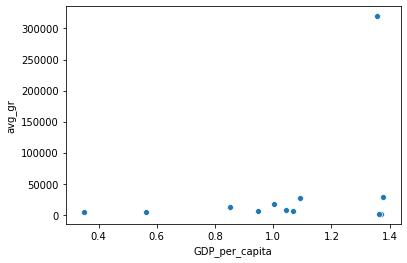

In [113]:
x=avgg["GDP_per_capita"]
y=avgg["avg_gr"]
sns.scatterplot(x,(y))

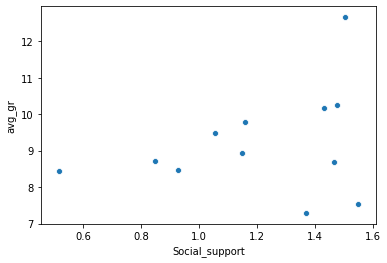

In [114]:
x=avgg["Social_support"]
y=avgg["avg_gr"]
sns.scatterplot(x,np.log(y))

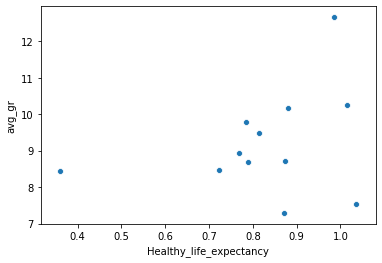

In [115]:
x=avgg["Healthy_life_expectancy"]
y=avgg["avg_gr"]
sns.scatterplot(x,np.log(y))

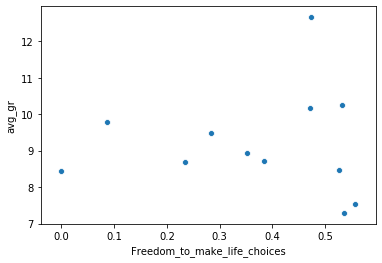

In [116]:
x=avgg["Freedom_to_make_life_choices"]
y=avgg["avg_gr"]
sns.scatterplot(x,np.log(y))